#  <center><u> Advanced Fixed Income and Credit : Group Assignment </u></center>

# Loading necessary packages for the assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


## QUESTION 1: Bootstrapping

# Q1.1
We load the data from the Excel file and modify Maturity Date to be a date and add a column tenor that corresponds to the difference betweeen the maturity date and August 15, 2003.

In [3]:
data = pd.read_excel("XLS698-XLS-ENG(2).xls", sheet_name = "Exhibit 1", skiprows = 2)[:-2]

In [4]:
data['Maturity Date'] = pd.to_datetime(data['Maturity Date'])

In [5]:
data['Tenor'] = [i / 2 for i in range(1,len(data['Maturity Date'])+1)]

In [6]:
data

,Coupon Rate (%),Maturity Date,Current Price,Tenor
0,3,2004-02-15,101.0544,0.5
1,2.125,2004-08-15,100.9254,1.0
2,1.5,2005-02-15,99.8942,1.5
3,6.5,2005-08-15,109.0934,2.0
4,5.625,2006-02-15,108.4380,2.5
5,2.375,2006-08-15,99.7848,3.0
6,6.25,2007-02-15,111.7184,3.5
7,3.25,2007-08-15,101.0841,4.0
8,3,2008-02-15,99.1692,4.5
9,3.25,2008-08-15,99.2710,5.0


We first compute the prices of discount bonds using this formula from the course:
$
P_{0}^{C,N} = \sum_{j=1}^{N} CF_j \cdot P_{0}^{j}
$

Once, we have computed the prices of discount bonds we can extract the zero-coupon yields using the following formula:

$
y_0^{f,\tau} = f \left( P_0^{T^{(-1)/(f\tau)}} - 1 \right)
$

In [7]:
def discount_prices(data,index): 
    if index == 0: 
        Price = data['Current Price'][0]/(100+data['Coupon Rate (%)'][0]/2)
    else: 
        Price =(1/(100+data['Coupon Rate (%)'][index]/2))* (data['Current Price'][index] -  (data['Coupon Rate (%)'][index]/2)*data['Discounted Price'][:index].sum())
    return Price

In [8]:
data['Discounted Price']=0
for k in range(len(data.index)) :
    data['Discounted Price'][k] = discount_prices(data[:k+1], k)
    
data['Zero Coupon Yield (in %)'] = data.index.map(lambda index : 2*(1/data['Discounted Price'][index]**(1/(2*data['Tenor'][index]))-1))*100
data

,Coupon Rate (%),Maturity Date,Current Price,Tenor,Discounted Price,Zero Coupon Yield (in %)
0,3,2004-02-15,101.0544,0.5,0.995610,0.881901
1,2.125,2004-08-15,100.9254,1.0,0.988176,1.192962
2,1.5,2005-02-15,99.8942,1.5,0.976738,1.575289
3,6.5,2005-08-15,109.0934,2.0,0.963406,1.872718
4,5.625,2006-02-15,108.4380,2.5,0.947375,2.174163
5,2.375,2006-08-15,99.7848,3.0,0.928970,2.471112
6,6.25,2007-02-15,111.7184,3.5,0.907564,2.790463
7,3.25,2007-08-15,101.0841,4.0,0.887418,3.008378
8,3,2008-02-15,99.1692,4.5,0.864791,3.254351
9,3.25,2008-08-15,99.2710,5.0,0.841559,3.479914


# Q1.2
We load the zero-coupon yields from Deutsche Bank's model in order to compare them with the market zero-coupon yields we just computed.
Then we merge the columns useful to compare, and to identify which bond to sell or to buy we do the following:
- If the zero coupon yield from Deutsche Bank's model is higher than the market zero-coupon yield then Deutsche Bank should sell this zero-coupon bond
- Otherwise, Deutsche Bank should buy the zero-coupon bond.

In [9]:
data2 = pd.read_excel("XLS698-XLS-ENG(2).xls", sheet_name = "Exhibit 4 ", skiprows = 2)[:-4]
data2

,Maturity (years),Model Prediction (BEY)
0,1y,1.2443%
1,2y,1.8727%
2,3y,2.4110%
3,4y,2.9665%
4,5y,3.4454%
5,6y,3.8557%
6,7y,4.1996%
7,8y,4.4677%
8,9y,4.6528%
9,10y,4.7107%


In [10]:
data['Maturity (years)'] = data['Tenor'].apply(lambda x: f'{int(x)}y' if x.is_integer() else f'{x}y')
data2 = pd.merge(data2, data[['Zero Coupon Yield (in %)', 'Maturity (years)']], on=['Maturity (years)'], how = 'left')

In [11]:
data2['Model Prediction (BEY)'] = data2['Model Prediction (BEY)'].apply(lambda x: float(x[:-1]))

In [12]:
data2['Decision'] = ''
for index in range(len(data2.index)): 
    if data2['Model Prediction (BEY)'][index] > data2['Zero Coupon Yield (in %)'][index]: 
        data2['Decision'][index] = 'Sell'
    else : 
        data2['Decision'][index] = 'Buy'

In [13]:
data2

,Maturity (years),Model Prediction (BEY),Zero Coupon Yield (in %),Decision
0,1y,1.2443,1.192962,Sell
1,2y,1.8727,1.872718,Buy
2,3y,2.4110,2.471112,Buy
3,4y,2.9665,3.008378,Buy
4,5y,3.4454,3.479914,Buy
5,6y,3.8557,3.881711,Buy
6,7y,4.1996,4.220336,Buy
7,8y,4.4677,4.486530,Buy
8,9y,4.6528,4.663971,Buy
9,10y,4.7107,4.710684,Sell


# Q1.3

This strategy of buying some bonds and selling others is an arbitrage strategy but whether it is a risk-free strategy depends on the accuracy of the Deutsche Bank's model at predicting the price. We cannot say it is a risk-free strategy because there are risks the model might be wrong and not 100% right. In fact, it depends on the risk of the model thus it is not risk-free.

## QUESTION 2: Cubic splines


# Q2.1

We define a function cubic_splines that performs cubic spline interpolation using the make_interp_spline function from SciPy. 
The k=3 parameter indicates cubic spline interpolation.

In [14]:
from scipy.interpolate import make_interp_spline

def cubic_splines(df, knots):
    
    x = df['Tenor'].apply(lambda x: float(x))
    knots.insert(0,df['Tenor'].iloc[0])
    knots.append(df['Tenor'].iloc[-1])
    knots = sorted(np.unique(knots))
    # Perform Cubic Spline Interpolation using make_interp_spline
    spline = make_interp_spline(knots, df['Zero Coupon Yield (in %)'].loc[x.isin(knots)], k=3)
    return spline(x)

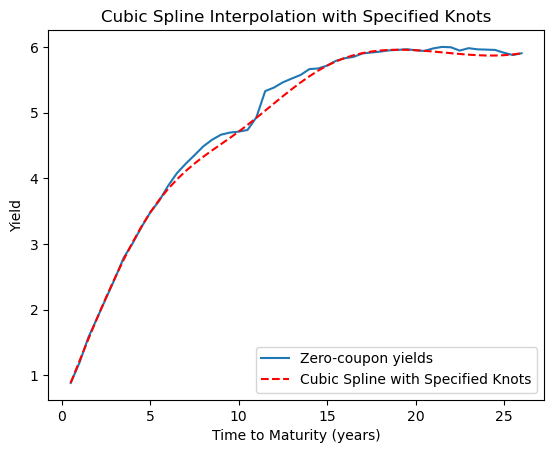

In [15]:
x = data['Maturity (years)'].apply(lambda x: float(x[:-1]))
y = data['Zero Coupon Yield (in %)']

knots = [2.0, 5.0, 10.0, 15.0,20.0]

y_cubic = cubic_splines(data, knots)

# Plot the original data and the B-spline
plt.plot(x,y, label='Zero-coupon yields')
plt.plot(x,y_cubic, label='Cubic Spline with Specified Knots', color='red', ls = '--')
plt.title('Cubic Spline Interpolation with Specified Knots')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Yield')
plt.legend()
plt.show()

# Q2.2

We evaluate the Cubic-spline for each of the different maturities and store the results in a new column to then be able to compare the new market zero-coupon yields with the zero-coupon yields from Deutsche Bank's model.

In [16]:
data_cubic= data.copy()
for i in range(data_cubic.shape[0]):
    data_cubic['Zero Coupon Yield (in %)'].iloc[i]= y_cubic[i]   
data_cubic = pd.merge(data2[['Model Prediction (BEY)', 'Maturity (years)']], data_cubic[['Zero Coupon Yield (in %)', 'Maturity (years)']], on=['Maturity (years)'], how = 'left')
data_cubic

,Model Prediction (BEY),Maturity (years),Zero Coupon Yield (in %)
0,1.2443,1y,1.218998
1,1.8727,2y,1.872718
2,2.4110,3y,2.481531
3,2.9665,4y,3.024307
4,3.4454,5y,3.479914
5,3.8557,6y,3.835220
6,4.1996,7y,4.109089
7,4.4677,8y,4.328381
8,4.6528,9y,4.519959
9,4.7107,10y,4.710684


In [17]:
data_cubic['Decision'] = ''
for index in range(len(data_cubic.index)): 
    if data_cubic['Model Prediction (BEY)'][index] > data_cubic['Zero Coupon Yield (in %)'][index]: 
        data_cubic['Decision'][index] = 'Sell'
    else : 
        data_cubic['Decision'][index] = 'Buy'
data_cubic

,Model Prediction (BEY),Maturity (years),Zero Coupon Yield (in %),Decision
0,1.2443,1y,1.218998,Sell
1,1.8727,2y,1.872718,Buy
2,2.4110,3y,2.481531,Buy
3,2.9665,4y,3.024307,Buy
4,3.4454,5y,3.479914,Buy
5,3.8557,6y,3.835220,Sell
6,4.1996,7y,4.109089,Sell
7,4.4677,8y,4.328381,Sell
8,4.6528,9y,4.519959,Sell
9,4.7107,10y,4.710684,Sell


We can see that using those new 'spline-based' zero-coupon yields affects the conclusions reached in Q1.2 because we do not buy and sell the same bonds as before.

# Q2.3

We use the same code as in Q2.1 but just change the knots.

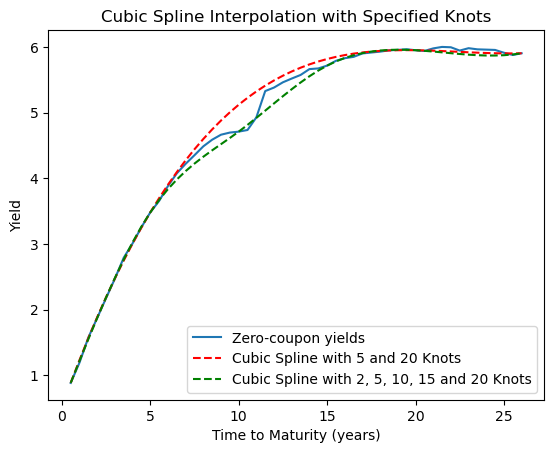

In [18]:
y_cubic_2 = cubic_splines(data,knots = [5.0,20.0])

# Plot the original data and the B-spline
plt.plot(x,y, label='Zero-coupon yields')
plt.plot(x, y_cubic_2, label='Cubic Spline with 5 and 20 Knots', color='red', ls='--')
plt.plot(x, y_cubic, label='Cubic Spline with 2, 5, 10, 15 and 20 Knots', color='green', ls='--')
plt.title('Cubic Spline Interpolation with Specified Knots')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Yield')
plt.legend()
plt.show()

Changing the knots affects the estimated zero coupon yields and thus the estimated discount function. Indeed, by looking at the graph, we can see that using only 5 and 20 zero coupon yields as knots give us a curve that follows the trend of the real zero coupon yields but it is less precise than with 2-, 5-,10-, 15- and 20-year zero coupon yields as knots because it has only 2 knots to approximate the function whereas earlier we used more knots so it's better approximated.

## QUESTION 3: Nelson Siegel model

# Q3.1

We use the curve_fit function from the scipy.optimize module because it is useful for nonlinear curve fitting which is exactly our case with the Nelson Siegel model.

[-44.96548483  45.33974484  80.88425994   2.44861358  31.83118842
   3.25296406]


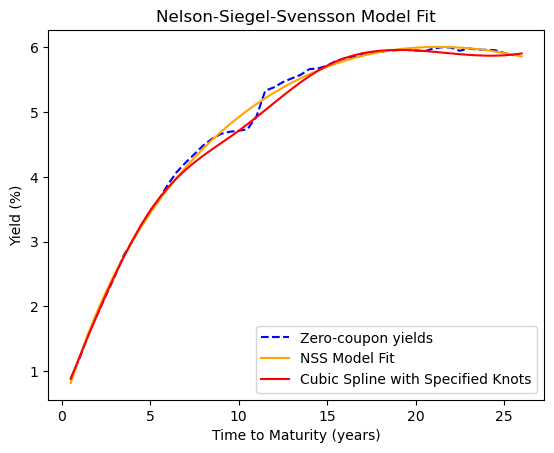

In [19]:
from scipy.optimize import curve_fit

def nss_model(t, beta0, beta1, beta2, beta3, tau1, tau2):
    """
    Nelson-Siegel-Svensson model function.
    
    Parameters:
    - t: Time to maturity
    - beta0, beta1, beta2: Parameters for the level component
    - tau1, tau2: Parameters for the slope and curvature components
    """
    return beta0 + beta1 * ((1 - np.exp(-t / tau1)) / (t / tau1)) + beta2 * (((1 - np.exp(-t / tau1)) / (t / tau1)) - np.exp(-t / tau1)) + beta3 * (((1 - np.exp(-t / tau2)) / (t / tau2)) - np.exp(-t / tau2))


x = data['Maturity (years)'].apply(lambda x: float(x[:-1]))
y = data['Zero Coupon Yield (in %)']

beta0 = np.max(y)
beta1 = np.max(y) - np.min(y)
beta2 = 2 * np.mean(y) - np.max(y) - np.min(y)
beta3 = beta2
tau1 = 5
tau2 = 5

p0 = [beta0, beta1, beta2, beta3, tau1, tau2]
    
# Fit the NSS model to the data
params, covariance = curve_fit(nss_model, x, y, p0) 
print(params)
# Extract the fitted parameters
beta0_fit, beta1_fit, beta2_fit, beta3_fit, tau1_fit, tau2_fit = params

# Generate fitted yield curve
yields_fit = nss_model(x, beta0_fit, beta1_fit, beta2_fit, beta3_fit, tau1_fit, tau2_fit)

# Plot the original yields and the fitted curve
plt.plot(x, y, label='Zero-coupon yields', color = 'blue', ls = '--' )
plt.plot(x, yields_fit, label='NSS Model Fit', color='orange')
plt.plot(x, y_cubic, label='Cubic Spline with Specified Knots', color='red')
plt.title('Nelson-Siegel-Svensson Model Fit')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

# Q3.3

In [20]:
def nss_model_list(t, beta0, beta1, beta2, beta3,tau1, tau2):
    """
    Nelson-Siegel-Svensson model function.
    
    Parameters:
    - t: Time to maturity
    - beta0, beta1, beta2: Parameters for the level component
    - tau1, tau2: Parameters for the slope and curvature components
    """
    return [beta0, beta1 * ((1 - np.exp(-t / tau1)) / (t / tau1)), beta2 * (((1 - np.exp(-t / tau1)) / (t / tau1)) - np.exp(-t / tau1)), beta3 * (((1 - np.exp(-t / tau2)) / (t / tau2)) - np.exp(-t / tau2))]

In [21]:
beta_0=[]
beta_1=[]
beta_2=[]
beta_3=[]

for i in range (len(data)):
    beta_0.append(nss_model_list(data['Maturity (years)'].apply(lambda x: float(x[:-1])).iloc[i],params[0],params[1],params[2],params[3],params[4],params[5])[0])
    beta_1.append(nss_model_list(data['Maturity (years)'].apply(lambda x: float(x[:-1])).iloc[i],params[0],params[1],params[2],params[3],params[4],params[5])[1])
    beta_2.append(nss_model_list(data['Maturity (years)'].apply(lambda x: float(x[:-1])).iloc[i],params[0],params[1],params[2],params[3],params[4],params[5])[2])
    beta_3.append(nss_model_list(data['Maturity (years)'].apply(lambda x: float(x[:-1])).iloc[i],params[0],params[1],params[2],params[3],params[4],params[5])[3])

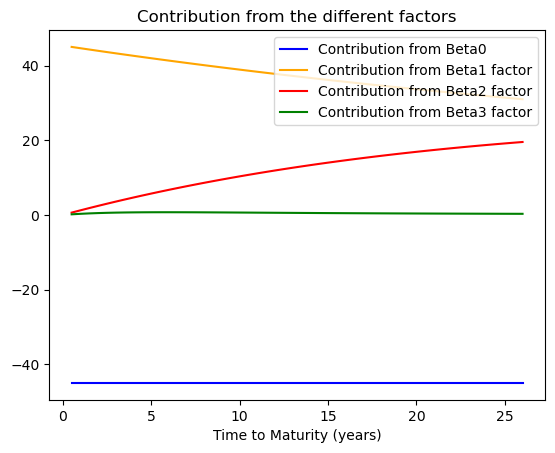

In [22]:
x = data['Maturity (years)'].apply(lambda x: float(x[:-1]))

plt.plot(x, beta_0, label='Contribution from Beta0', color = 'blue' )
plt.plot(x, beta_1, label='Contribution from Beta1 factor', color='orange')
plt.plot(x, beta_2, label='Contribution from Beta2 factor', color='red')
plt.plot(x, beta_3, label='Contribution from Beta3 factor', color='green')

plt.title('Contribution from the different factors')
plt.xlabel('Time to Maturity (years)')
plt.legend()
plt.show()

## QUESTION 4: Hedging

# Q4.1

We shock the 10y rate by 50 bps and use the code from Q2.1 to run a cubic spline to estimate the new discount function with the shock.

In [23]:
data_krd=data.copy()
data_krd.loc[data_krd[data_krd['Maturity (years)'] == '10y'].index, 'Zero Coupon Yield (in %)'] += 0.5
data_krd.loc[data_krd[data_krd['Maturity (years)'] == '10y'].index, 'Discounted Price'] = 1/(1+(data_krd.loc[data_krd[data_krd['Maturity (years)'] == '10y'].index, 'Zero Coupon Yield (in %)']/200))**(2*data_krd.loc[data_krd[data_krd['Maturity (years)'] == '10y'].index, 'Tenor'])

In [24]:
data_krd

,Coupon Rate (%),Maturity Date,Current Price,Tenor,Discounted Price,Zero Coupon Yield (in %),Maturity (years)
0,3,2004-02-15,101.0544,0.5,0.995610,0.881901,0.5y
1,2.125,2004-08-15,100.9254,1.0,0.988176,1.192962,1y
2,1.5,2005-02-15,99.8942,1.5,0.976738,1.575289,1.5y
3,6.5,2005-08-15,109.0934,2.0,0.963406,1.872718,2y
4,5.625,2006-02-15,108.4380,2.5,0.947375,2.174163,2.5y
5,2.375,2006-08-15,99.7848,3.0,0.928970,2.471112,3y
6,6.25,2007-02-15,111.7184,3.5,0.907564,2.790463,3.5y
7,3.25,2007-08-15,101.0841,4.0,0.887418,3.008378,4y
8,3,2008-02-15,99.1692,4.5,0.864791,3.254351,4.5y
9,3.25,2008-08-15,99.2710,5.0,0.841559,3.479914,5y


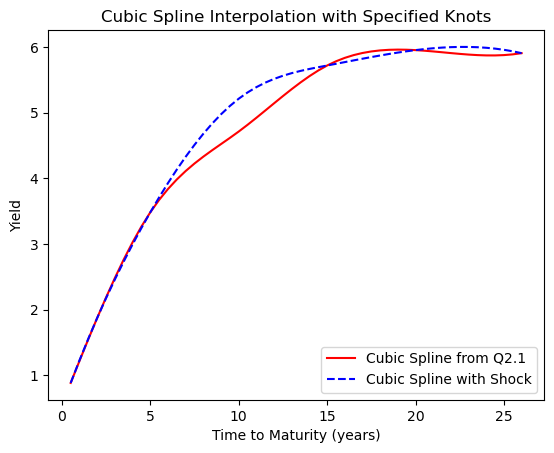

In [25]:
y_shock = cubic_splines(data_krd, knots = [2.0, 5.0, 10.0, 15.0,20.0])

# Plot the B-spline from Q2.1 and the B-spline with the shock on the 10y rate
plt.plot(x,y_cubic, label='Cubic Spline from Q2.1', color='red')
plt.plot(x,y_shock, label='Cubic Spline with Shock', color='blue',ls = '--')
plt.title('Cubic Spline Interpolation with Specified Knots')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Yield')
plt.legend()
plt.show()

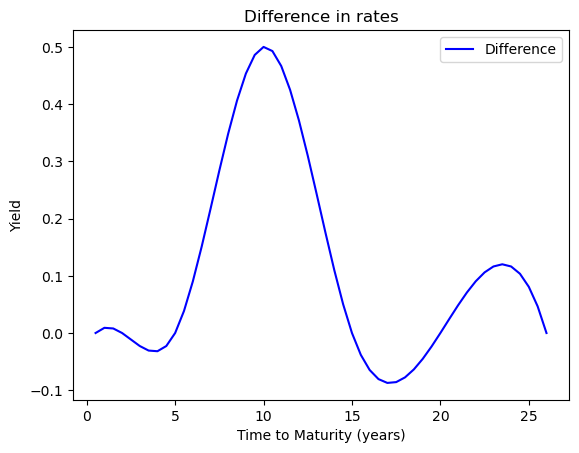

In [26]:
plt.plot(x,y_shock - y_cubic, label='Difference', color='blue')
plt.title('Difference in rates')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Yield')
plt.legend()
plt.show()

# Q4.2

We assume we have a 1 million $ portfolio equally invested in all bonds. As the prices of the bonds are different, we define the weights as the Price of the bond divided by the sum of the prices of all bonds so it is equally invested in all bonds.

In [27]:
cash = 1000000
num_bonds=data.shape[0]
weights=data_krd['Discounted Price']*cash /data_krd['Discounted Price'].sum()

In [28]:
weights

0     35334.702087
1     35070.880544
2     34664.932847
3     34191.780163
4     33622.806468
5     32969.610384
6     32209.911186
7     31494.920704
8     30691.884084
9     29867.354626
10    29080.209698
11    28179.479040
12    27304.385116
13    26493.929188
14    25697.312890
15    24886.102380
16    24136.092658
17    23437.270221
18    22834.205861
19    21218.409229
20    21710.901096
21    20774.027001
22    19384.394147
23    18763.069518
24    18094.700100
25    17486.582459
26    16895.242404
27    16238.730201
28    15768.956142
29    15237.953921
30    14652.362882
31    14151.618142
32    13705.727770
33    13202.436293
34    12793.648175
35    12396.386718
36    11997.686274
37    11635.882175
38    11278.564568
39    10983.237547
40    10690.529794
41    10299.541268
42     9953.427622
43     9674.450191
44     9497.199433
45     9147.876424
46     8917.949625
47     8668.407962
48     8426.819124
49     8268.795073
50     8100.293082
51     7816.423494
Name: Discou

We estimate the price of the discount bonds with the shocked rate using the result from our previous cubic spline.

In [29]:
data_cubic=data_krd.copy()
for i in range(data_cubic.shape[0]):
    data_cubic['Zero Coupon Yield (in %)'].iloc[i]= y_shock[i]
    data_cubic['Discounted Price'][i] = 1/((data_cubic['Zero Coupon Yield (in %)'][i]/200+1)**(2*data['Tenor'][i]))
data_cubic

,Coupon Rate (%),Maturity Date,Current Price,Tenor,Discounted Price,Zero Coupon Yield (in %),Maturity (years)
0,3,2004-02-15,101.0544,0.5,0.995610,0.881901,0.5y
1,2.125,2004-08-15,100.9254,1.0,0.987831,1.228087,1y
2,1.5,2005-02-15,99.8942,1.5,0.976988,1.558104,1.5y
3,6.5,2005-08-15,109.0934,2.0,0.963406,1.872718,2y
4,5.625,2006-02-15,108.4380,2.5,0.947409,2.172697,2.5y
5,2.375,2006-08-15,99.7848,3.0,0.929309,2.458808,3y
6,6.25,2007-02-15,111.7184,3.5,0.909403,2.731818,3.5y
7,3.25,2007-08-15,101.0841,4.0,0.887974,2.992494,4y
8,3,2008-02-15,99.1692,4.5,0.865280,3.241604,4.5y
9,3.25,2008-08-15,99.2710,5.0,0.841559,3.479914,5y


The KRD is just the difference in PV with the shocked rate and the PV with the normal rates.

In [30]:
(data_cubic['Discounted Price'] - data['Discounted Price'])@weights

-4270.642452120672

# Q4.3

We do the same as before but this time for all maturities.
We take all data as knots except the i-1 and i to have a local deformation of the curve due to the shock on data point i.

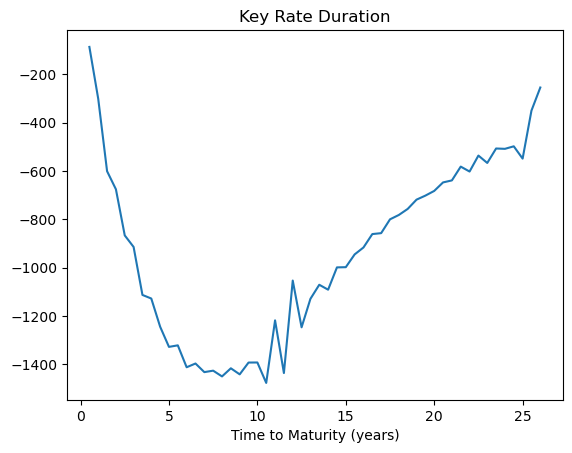

In [31]:
y_coord = []
for i in range(len(data)): 
    data_krd =data.copy()
    data_krd['Zero Coupon Yield (in %)'][i] += 0.5
    knots = data_krd['Tenor'].iloc[:i-1].tolist() + [data_krd['Tenor'].iloc[i]] + data_krd['Tenor'].iloc[i+2:].tolist()
    y_shock = cubic_splines(data_krd, knots)
    for k in range(data_cubic.shape[0]):
        data_krd['Discounted Price'][k] = 1/((y_shock[k]/200+1)**(2*data['Tenor'][k]))
    KRD = (data_krd['Discounted Price'] - data['Discounted Price'])@weights
    y_coord.append(KRD)
    
plt.plot(x, y_coord,label='KRD' )
plt.title('Key Rate Duration')
plt.xlabel('Time to Maturity (years)')
plt.show()

## Question 5 : Portfolio strategy

# Q5.1

We set a seed for reproducibility of the results and calculate y_steepen using the formula from the instructions.

In [33]:
def y_steepen(data):
    np.random.seed(123)
    data_steepen= []
    noise = pd.DataFrame({'Noise': [np.random.normal(0, 0.0025) for x in range(len(data))]})
    for k in range(len(data)):
        data_steepen.append(data['Zero Coupon Yield (in %)'].iloc[k]/100 + (data['Tenor'].iloc[k] - data['Tenor'].mean())/data['Tenor'].mean()* 0.0050)# + noise.iloc[k]
    y_steepen_df = pd.DataFrame({'Deterministic': data_steepen,'Noise': noise['Noise']})
    return y_steepen_df

In [34]:
y_steepen_data = y_steepen(data)
y_steepen_data['Y_steepen'] = (y_steepen_data['Deterministic'] + y_steepen_data['Noise'])*100
y_steepen_data

,Deterministic,Noise,Y_steepen
0,0.004008,-0.002714,0.129362
1,0.007307,0.002493,0.980034
2,0.011319,0.000707,1.202637
3,0.014482,-0.003766,1.071616
4,0.017685,-0.001447,1.623852
5,0.020843,0.004129,2.497179
6,0.024225,-0.006067,1.815869
7,0.026593,-0.001072,2.552093
8,0.029242,0.003165,3.240646
9,0.031686,-0.002167,2.951908


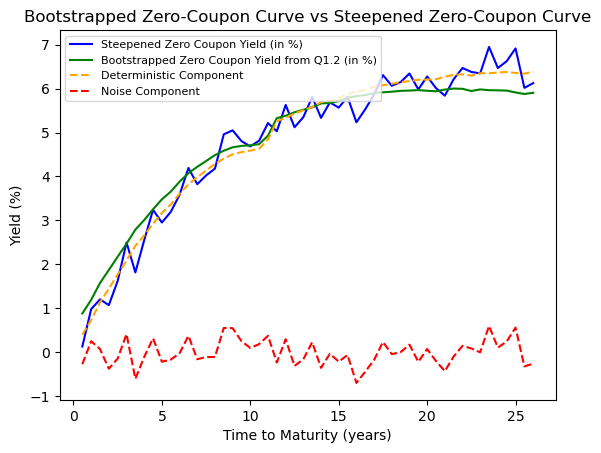

In [35]:
plt.plot(data['Tenor'], y_steepen_data['Y_steepen'], color = 'blue',label='Steepened Zero Coupon Yield (in %)')
plt.plot(data['Tenor'], data['Zero Coupon Yield (in %)'], color = 'green',label='Bootstrapped Zero Coupon Yield from Q1.2 (in %)')
plt.plot(data['Tenor'], y_steepen_data['Deterministic']*100,color = 'orange',label='Deterministic Component' , ls = '--')
plt.plot(data['Tenor'], y_steepen_data['Noise']*100,color = 'red',label='Noise Component', ls = '--' )
plt.title('Bootstrapped Zero-Coupon Curve vs Steepened Zero-Coupon Curve')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Yield (%)')
plt.legend(loc='upper left', fontsize = 8)
plt.show()

# Q5.2

We use the same code as in Q3 to implement the Nelson Siegel model.

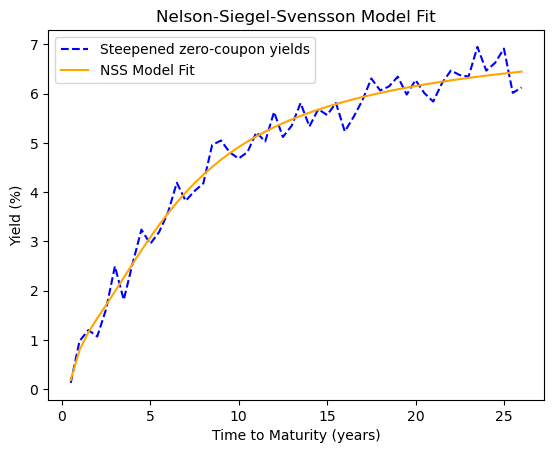

In [36]:
from scipy.optimize import curve_fit

def nss_model(t, beta0, beta1, beta2, beta3, tau1, tau2):
    """
    Nelson-Siegel-Svensson model function.
    
    Parameters:
    - t: Time to maturity
    - beta0, beta1, beta2: Parameters for the level component
    - tau1, tau2: Parameters for the slope and curvature components
    """
    return beta0 + beta1 * ((1 - np.exp(-t / tau1)) / (t / tau1)) + beta2 * (((1 - np.exp(-t / tau1)) / (t / tau1)) - np.exp(-t / tau1)) + beta3 * (((1 - np.exp(-t / tau2)) / (t / tau2)) - np.exp(-t / tau2))

x = data['Maturity (years)'].apply(lambda x: float(x[:-1]))
y = y_steepen_data['Y_steepen']

beta0 = np.max(y)
beta1 = np.max(y) - np.min(y)
beta2 = 2 * np.mean(y) - np.max(y) - np.min(y)
beta3 = beta2
tau1 = 1
tau2 = 1

p0 = [beta0, beta1, beta2, beta3, tau1, tau2]
    
# Fit the NSS model to the data
params, covariance = curve_fit(nss_model, x, y, p0) 

# Extract the fitted parameters
beta0_fit, beta1_fit, beta2_fit, beta3_fit, tau1_fit, tau2_fit = params

# Generate fitted yield curve
yields_fit = nss_model(x, beta0_fit, beta1_fit, beta2_fit, beta3_fit, tau1_fit, tau2_fit)

# Plot the original yields and the fitted curve
plt.plot(x, y, label='Steepened zero-coupon yields', color = 'blue', ls = '--' )
plt.plot(x, yields_fit, label='NSS Model Fit', color='orange')
plt.title('Nelson-Siegel-Svensson Model Fit')
plt.xlabel('Time to Maturity (years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.show()

In [37]:
data['Steepened Zero-coupon yields (in %)']=yields_fit
data

,Coupon Rate (%),Maturity Date,Current Price,Tenor,Discounted Price,Zero Coupon Yield (in %),Maturity (years),Steepened Zero-coupon yields (in %)
0,3,2004-02-15,101.0544,0.5,0.995610,0.881901,0.5y,0.187099
1,2.125,2004-08-15,100.9254,1.0,0.988176,1.192962,1y,0.797448
2,1.5,2005-02-15,99.8942,1.5,0.976738,1.575289,1.5y,1.157034
3,6.5,2005-08-15,109.0934,2.0,0.963406,1.872718,2y,1.439998
4,5.625,2006-02-15,108.4380,2.5,0.947375,2.174163,2.5y,1.710035
5,2.375,2006-08-15,99.7848,3.0,0.928970,2.471112,3y,1.985019
6,6.25,2007-02-15,111.7184,3.5,0.907564,2.790463,3.5y,2.265297
7,3.25,2007-08-15,101.0841,4.0,0.887418,3.008378,4y,2.545747
8,3,2008-02-15,99.1692,4.5,0.864791,3.254351,4.5y,2.820620
9,3.25,2008-08-15,99.2710,5.0,0.841559,3.479914,5y,3.085244


Then we calculate the prices of the bonds using the formula that we used for Q1.

In [38]:
def bond_price(maturity, coupon_rate, zero_coupon_yield):
    semi_annual_coupon_rate = coupon_rate / 2
    periods = int(maturity * 2)
    present_value = 0
    for t in range(1, periods + 1):
        if t < periods:
            present_value += semi_annual_coupon_rate / 100 * 100 / (1 + zero_coupon_yield / 200)**t
        else:
            present_value += (semi_annual_coupon_rate / 100 + 100) / (1 + zero_coupon_yield / 200)**t
    
    return present_value

data['Steepened Price'] = data.apply(lambda row: bond_price(row['Tenor'], row['Coupon Rate (%)'], row['Steepened Zero-coupon yields (in %)']), axis=1)

In [39]:
data

,Coupon Rate (%),Maturity Date,Current Price,Tenor,Discounted Price,Zero Coupon Yield (in %),Maturity (years),Steepened Zero-coupon yields (in %),Steepened Price
0,3,2004-02-15,101.0544,0.5,0.995610,0.881901,0.5y,0.187099,99.921524
1,2.125,2004-08-15,100.9254,1.0,0.988176,1.192962,1y,0.797448,100.276117
2,1.5,2005-02-15,99.8942,1.5,0.976738,1.575289,1.5y,1.157034,99.778793
3,6.5,2005-08-15,109.0934,2.0,0.963406,1.872718,2y,1.439998,106.813954
4,5.625,2006-02-15,108.4380,2.5,0.947375,2.174163,2.5y,1.710035,106.872951
5,2.375,2006-08-15,99.7848,3.0,0.928970,2.471112,3y,1.985019,100.022369
6,6.25,2007-02-15,111.7184,3.5,0.907564,2.790463,3.5y,2.265297,110.476272
7,3.25,2007-08-15,101.0841,4.0,0.887418,3.008378,4y,2.545747,101.208339
8,3,2008-02-15,99.1692,4.5,0.864791,3.254351,4.5y,2.820620,99.443970
9,3.25,2008-08-15,99.2710,5.0,0.841559,3.479914,5y,3.085244,99.377594


We identify the Expensive bonds as the ones which are below the current market price and the cheap as the ones whose prices are above the current market price.

In [40]:
data['Decision'] = ''
for index in range(len(data.index)): 
    if data['Current Price'][index] > data['Steepened Price'][index]: 
        data['Decision'][index] = 'Expensive'
    else : 
        data['Decision'][index] = 'Cheap'

In [41]:
data

,Coupon Rate (%),Maturity Date,Current Price,Tenor,Discounted Price,Zero Coupon Yield (in %),Maturity (years),Steepened Zero-coupon yields (in %),Steepened Price,Decision
0,3,2004-02-15,101.0544,0.5,0.995610,0.881901,0.5y,0.187099,99.921524,Expensive
1,2.125,2004-08-15,100.9254,1.0,0.988176,1.192962,1y,0.797448,100.276117,Expensive
2,1.5,2005-02-15,99.8942,1.5,0.976738,1.575289,1.5y,1.157034,99.778793,Expensive
3,6.5,2005-08-15,109.0934,2.0,0.963406,1.872718,2y,1.439998,106.813954,Expensive
4,5.625,2006-02-15,108.4380,2.5,0.947375,2.174163,2.5y,1.710035,106.872951,Expensive
5,2.375,2006-08-15,99.7848,3.0,0.928970,2.471112,3y,1.985019,100.022369,Cheap
6,6.25,2007-02-15,111.7184,3.5,0.907564,2.790463,3.5y,2.265297,110.476272,Expensive
7,3.25,2007-08-15,101.0841,4.0,0.887418,3.008378,4y,2.545747,101.208339,Cheap
8,3,2008-02-15,99.1692,4.5,0.864791,3.254351,4.5y,2.820620,99.443970,Cheap
9,3.25,2008-08-15,99.2710,5.0,0.841559,3.479914,5y,3.085244,99.377594,Cheap


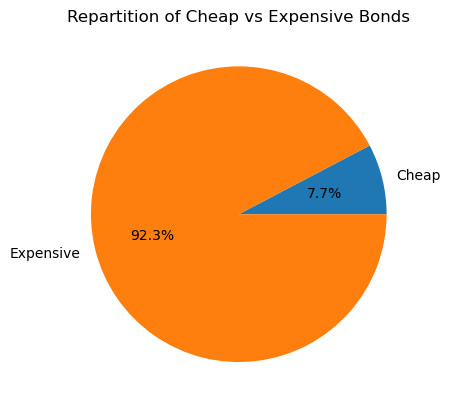

In [42]:
cheap_bonds = (data['Decision'] == 'Cheap').sum()
expensive_bonds = (data['Decision'] == 'Expensive').sum()
my_labels = ['Cheap', 'Expensive']
sizes = np.array([cheap_bonds, expensive_bonds])

plt.pie(sizes, labels=my_labels, autopct='%1.1f%%')
plt.title('Repartition of Cheap vs Expensive Bonds')
plt.show()

# Q5.3

We start with 100 for long positions and 100 for short positions because we want a zero-cost long short portfolio.
Then we invest equally in the bonds we buy (that is the ones who are cheap) and in the bonds we sell (that is the ones who are expensive) because we don't know the probability of being right or wrong in the model so we cannot attribute a probability and thus we cannot go long (resp short) the bonds which we think will stay like the model.

In [43]:
initial_investment = 100

data['Investment Amount'] = 0

cheap_bonds = data[data['Decision'] == 'Cheap']
expensive_bonds = data[data['Decision'] == 'Expensive']

cheap_investment = initial_investment / len(cheap_bonds)
expensive_investment = initial_investment / len(expensive_bonds)

data.loc[data['Decision'] == 'Cheap', 'Investment Amount'] = cheap_investment
data.loc[data['Decision'] == 'Expensive', 'Investment Amount'] = -expensive_investment  

data

,Coupon Rate (%),Maturity Date,Current Price,Tenor,Discounted Price,Zero Coupon Yield (in %),Maturity (years),Steepened Zero-coupon yields (in %),Steepened Price,Decision,Investment Amount
0,3,2004-02-15,101.0544,0.5,0.995610,0.881901,0.5y,0.187099,99.921524,Expensive,-2.083333
1,2.125,2004-08-15,100.9254,1.0,0.988176,1.192962,1y,0.797448,100.276117,Expensive,-2.083333
2,1.5,2005-02-15,99.8942,1.5,0.976738,1.575289,1.5y,1.157034,99.778793,Expensive,-2.083333
3,6.5,2005-08-15,109.0934,2.0,0.963406,1.872718,2y,1.439998,106.813954,Expensive,-2.083333
4,5.625,2006-02-15,108.4380,2.5,0.947375,2.174163,2.5y,1.710035,106.872951,Expensive,-2.083333
5,2.375,2006-08-15,99.7848,3.0,0.928970,2.471112,3y,1.985019,100.022369,Cheap,25.000000
6,6.25,2007-02-15,111.7184,3.5,0.907564,2.790463,3.5y,2.265297,110.476272,Expensive,-2.083333
7,3.25,2007-08-15,101.0841,4.0,0.887418,3.008378,4y,2.545747,101.208339,Cheap,25.000000
8,3,2008-02-15,99.1692,4.5,0.864791,3.254351,4.5y,2.820620,99.443970,Cheap,25.000000
9,3.25,2008-08-15,99.2710,5.0,0.841559,3.479914,5y,3.085244,99.377594,Cheap,25.000000


We assume the model is 100% right, so then the expected return is just (Market Price - Steepened Price)*Investment. 
It is a simplification because otherwise we would have to multiply by the probability of our view being right and being wrong, but here it is not the case as we don't have the evolution of the market prices.
Here, we will have positive expected returns for all of the bonds, which is not the case in real life.

In [44]:
data['Expected Return']=0
for i in range(len(data)):
    if data['Investment Amount'].iloc[i]<0:
        data['Expected Return'].iloc[i] = (data['Current Price'].iloc[i] - data['Steepened Price'].iloc[i]) * -data['Investment Amount'].iloc[i]
    else:
        data['Expected Return'].iloc[i] = -(data['Current Price'].iloc[i] - data['Steepened Price'].iloc[i]) * data['Investment Amount'].iloc[i]

In [45]:
data

,Coupon Rate (%),Maturity Date,Current Price,Tenor,Discounted Price,Zero Coupon Yield (in %),Maturity (years),Steepened Zero-coupon yields (in %),Steepened Price,Decision,Investment Amount,Expected Return
0,3,2004-02-15,101.0544,0.5,0.995610,0.881901,0.5y,0.187099,99.921524,Expensive,-2.083333,2.360159
1,2.125,2004-08-15,100.9254,1.0,0.988176,1.192962,1y,0.797448,100.276117,Expensive,-2.083333,1.352672
2,1.5,2005-02-15,99.8942,1.5,0.976738,1.575289,1.5y,1.157034,99.778793,Expensive,-2.083333,0.240432
3,6.5,2005-08-15,109.0934,2.0,0.963406,1.872718,2y,1.439998,106.813954,Expensive,-2.083333,4.748846
4,5.625,2006-02-15,108.4380,2.5,0.947375,2.174163,2.5y,1.710035,106.872951,Expensive,-2.083333,3.260519
5,2.375,2006-08-15,99.7848,3.0,0.928970,2.471112,3y,1.985019,100.022369,Cheap,25.000000,5.939226
6,6.25,2007-02-15,111.7184,3.5,0.907564,2.790463,3.5y,2.265297,110.476272,Expensive,-2.083333,2.587767
7,3.25,2007-08-15,101.0841,4.0,0.887418,3.008378,4y,2.545747,101.208339,Cheap,25.000000,3.105982
8,3,2008-02-15,99.1692,4.5,0.864791,3.254351,4.5y,2.820620,99.443970,Cheap,25.000000,6.869240
9,3.25,2008-08-15,99.2710,5.0,0.841559,3.479914,5y,3.085244,99.377594,Cheap,25.000000,2.664858


In [46]:
Expected_Return = data['Expected Return'].sum()
Expected_Return

761.2853801987279